# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

##**Project Report: Building a Music Recommendation System for Spotify**
________________________________________
**Executive Summary**

In this project, we set out to build a music recommendation system for Spotify, aiming to suggest ten songs to users based on their likelihood of enjoying them. To achieve this, we experimented with a variety recommendation models, fine-tuning each one to maximise its accuracy and effectiveness.
The objective is to enhance user satisfaction by delivering more personalized song recommendations, ultimately increasing user engagement on the platform. After implementing and testing the models, we found that Matrix Factorization and User-User Collaborative Filtering performed particularly well in terms of accuracy and scalability. This report provides an overview of the methodologies used, key insights from the analysis, and recommendations for implementing the most effective solution.
________________________________________
**Problems and Solutions Summary**

*Problem*

The main challenge for Spotify is to develop a personalized recommendation system that could reliably predict which songs a user would likely enjoy, based on their listening history. Given Spotify’s vast music library  and diverse user base, the system needs to be robust, scalable, and capable of handling large volumes of data.
Solutions
To address this, we built and evaluated the following models:
1.	**Popularity-based Recommendation System:** Recommends songs based on overall popularity and play counts, limits personalisation.
2.	**User-User Collaborative Filtering:** Recommends songs based on similarities between users' preferences.
3.	**Item-Item Collaborative Filtering:** Recommends songs based on similarities between songs that users have liked or played.
4.	**Matrix Factorization:** Decomposes the user-song interaction matrix to uncover hidden patterns in user preferences.
5.	**Clustering:** Groups users or songs into clusters based on similarities to generate recommendations.
6.	**Content-Based Systems:** Recommends songs based on attributes such as genre, artist, and tempo, comparing the characteristics of songs a user has liked.
Each model was tested for its recommendation quality and performance metrics such as precision, recall, and F1 score were used to gauge suitability.
________________________________________

**Analysis and Key Insights**

*Model Performance:*

- Popularity-based Recommendation System: This model was straightforward to implement but offered minimal personalization. It worked well in suggesting popular songs but lacked the ability to tailor recommendations to individual user preferences.
- User-User Collaborative Filtering: The tuned version of this model had the highest F-1 score meaning it provided highly personalized recommendations by considering users with similar preferences.
- Item-Item Collaborative Filtering: This approach is weak in recommending songs as it recorded the lowest F-1 score. Additionally, none of the songs this model proposed featured in any other model’s recommended song list.
- Matrix Factorization: With the second highest F-1 score for the tuned model, this approach effectively captured latent user preferences, making it highly effective for large-scale recommendations.
- Clustering: By grouping play count into clusters, this model provided a good balance between personalization and scalability. However, it didn’t capture as much detail as other methods and was generally less precise.
- Content-Based Systems: This model was not at all useful for new users with limited listening history, as it relied on song attributes rather than user interaction data. It was not effective at suggesting music beyond the user's usual preferences.


*Key Insights*
1.	User-User Collaborative Filtering and Matrix Factorization are the top-performing models, offering strong recommendation quality.
2.	Cold-Start Problem: Content-Based System was the most affected, presumably due to the system not having enough information about new users or songs.
3.	Model Scalability: Matrix Factorization showed strong potential for large-scale implementation due to its speed and efficiency in making recommendations even with vast amounts of data.
________________________________________
**Recommendations for Implementation**
1.	Implement a hybrid model: Given the strengths of each model, we recommend implementing a hybrid approach combining Matrix Factorization and User-User Collaborative Filtering. This setup can leverage the latent factors from matrix factorization for accurate, scalable predictions, while the user-user approach provides an additional layer of user-to-user similarity, enhancing recommendation diversity.
2.	Incorporate popularity based model for new users: To address the cold-start problem, integrating content-based filtering within the hybrid model will ensure new users receive recommendations based on song attributes until sufficient interaction data is collected.
3.	Regularly update models: Regularly updating the models with fresh data will help capture evolving user preferences. Matrix Factorization, in particular, benefits from periodic updates to retain relevance over time.

By implementing these recommendations, Spotify can provide an engaging and personalized recommendation system that enhance user satisfaction and engagement on the platform.



### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np, pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Python Course/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Python Course/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
- Song ID is an overlapping/common column in both datasets so it can be combined while merging.
- Count data has 4 columns; two integer type and the other half object datatype.
- Most of the columns in Song data are of object datatype except year, which is an integer datatype.



In [8]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
# Drop the column 'Unnamed: 0'
## Name the obtained dataframe as "df"
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()


,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [9]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

In [ ]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [10]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [11]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [12]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [13]:
# We want our song to be listened by atleast 120 users to be considered
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [14]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [15]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [16]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [17]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [18]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:**
- df_final has 117876 rows and 7 columns.
- Total number of unique user id is 3155.
- Total number of unique song id is 563.
- Total number of unique artists is 232.
- The possibility of each user having listened to every song is 3155*563 = 1,776,265. Since our dataset has less than this, we can build a recommendation system to recommend songs not listened to.



### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [19]:
df_final[['song_id', 'release']].value_counts().head(10)

,,count
song_id,release,
8582,Use Somebody,751
352,Now That's What I Call Music! 75,748
2220,Musik von Harmonia,713
1118,A Rush Of Blood To The Head,662
4152,The Scientist,652
5531,Waking Up,618
4448,Karaoke Monthly Vol. 2 (January 2010),609
6189,Pablo Honey,606
6293,Yellow,583


Most interacted users

In [20]:
df_final['user_id'].value_counts().head(10)

,count
user_id,
61472,243
15733,227
37049,202
9570,184
23337,177
10763,176
26616,175
9097,175
43041,174


#### **Observations and Insights:**
- The most listened to song is 'Use Somebody' and has been played 751 times.
- User 61472 has interacted with songs 243 times.


Songs released on yearly basis

In [21]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
count_songs = song_df.groupby('year').count()['title']
count_songs

,title
year,
0,484409
1922,6
1924,5
1925,7
1926,19
...,...
2007,39414
2008,34770
2009,31051


In [22]:
#dropping the number of songs not attributed to any year:
count_songs.drop(count_songs.index[0], inplace = True)
count_songs.head()

,title
year,
1922,6
1924,5
1925,7
1926,19
1927,43


In [23]:
count_songs.tail()

,title
year,
2007,39414
2008,34770
2009,31051
2010,9397
2011,1


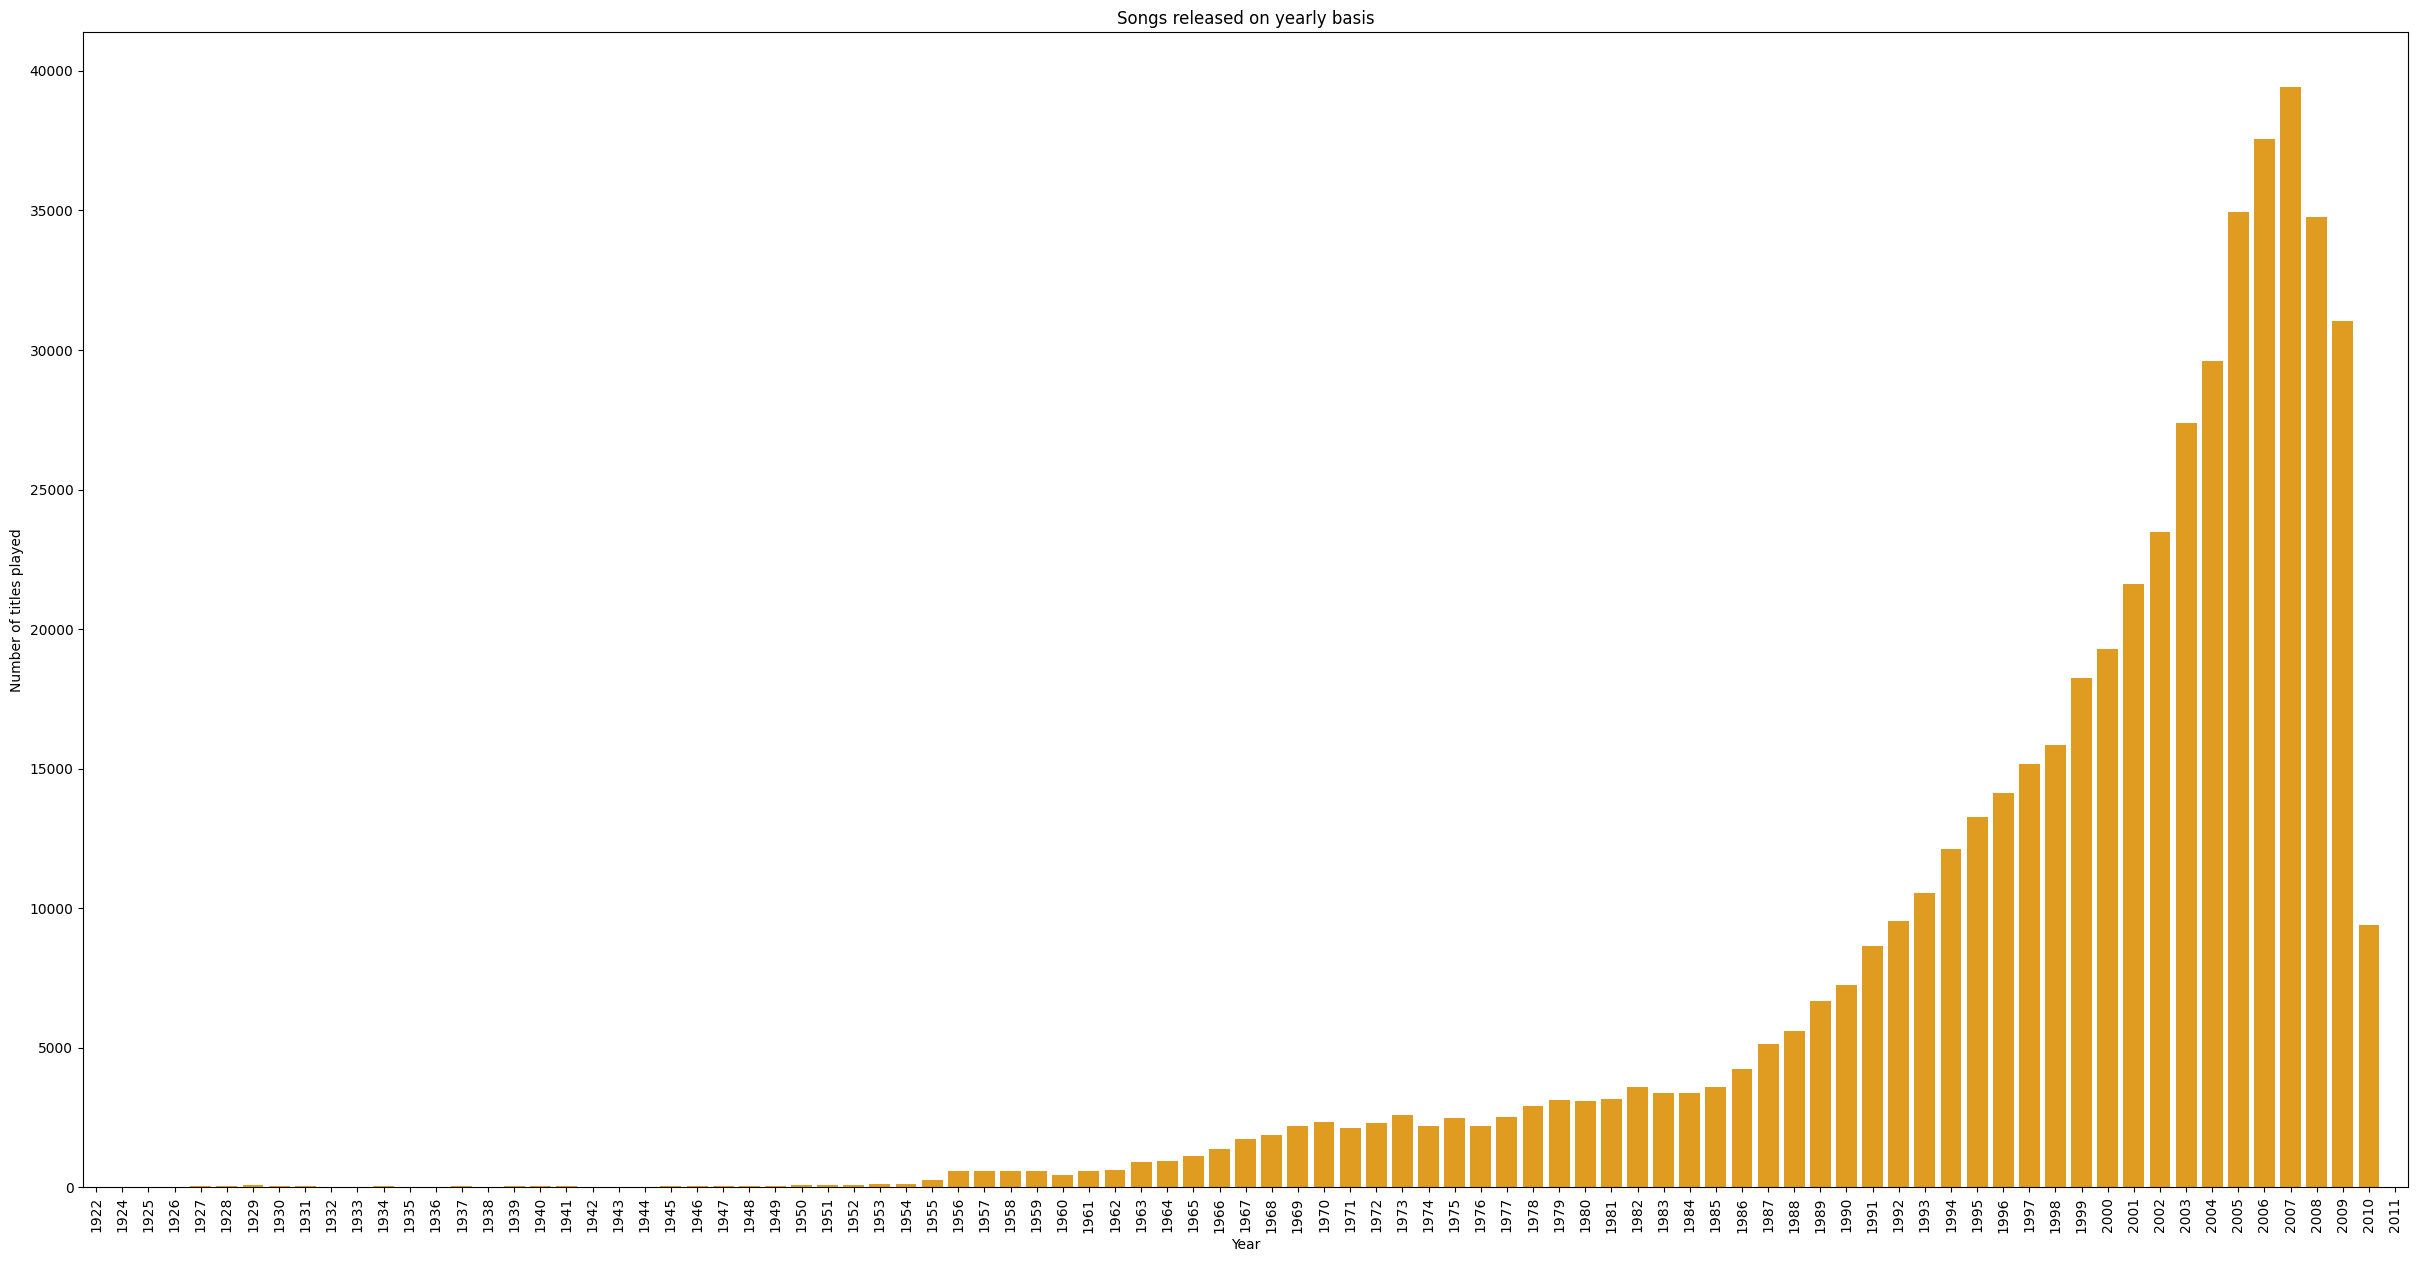

In [25]:
# Set the figure size
plt.figure(figsize = (30, 15))

# Create a barplot plot with y label as "number of titles played" and x -axis year
count = pd.DataFrame(count_songs)
bp = sns.barplot(x = count.index, y = count.title, data = count, estimator = np.median, color = 'orange')
for item in bp.get_xticklabels():item.set_rotation(90)

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of titles played')

# Setting the title of the plot
plt.title('Songs released on yearly basis')

# Show the plot
plt.show()

#### **Observations and Insights:__________** #
- Before 1950, very few songs, if any, were being released.
- Number of songs released per year have been steadily increasing since 1950 and peaked in 2007 then the numbers started to reduce.
- There appears to be a large drop between 2009 and 2010. This could be due to market competition where songs are being released on a different platform.
- 2011 has recorded 1 song. The data may have been collected at the beginning of the year, so the figure may need updating or we could exclude 2011 altogether.



**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count using groupby function on the song_id column
average_count = df_final.groupby('song_id').mean(numeric_only = True)['play_count']

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']
play_freq.head()

,play_count
song_id,
21,265
22,132
52,421
62,114
93,115


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(final_play, n, min_playcount):
    recommendations = final_play[final_play['play_freq'] >= min_playcount].sort_values('avg_count', ascending = False).head(n)
    return recommendations

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 100).index)

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [26]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357284 sha256=967aae8cf8e834d4d466d5bd503a87753a89ac0cece0d92ebf0e3ce69794b509
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [27]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [32]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)

    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [34]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale  = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[["user_id","song_id", "play_count"]], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [35]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine','user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
- The RMSE value checks how far predicted ratings are from the actual ratings.
- The precision value of 0.396 means that 39.6% of all recommended songs are relevant.
- The recall value of 0.692 means that 69.2% of all relevant songs are recommended.
- The F-1 score of 0.504 means 50.4% of recommended songs are relevant and vice versa.
- This model is performing okay so far, will need tuning for better results.


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

sim_user_user.predict(6958,3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**

- The model estimated the user will listen to song 1670 1.8 times which is close to 2, the true number of times.
- For song 3232, the model estimates 1.64 interactions, lower than the training data, so the model could be overfitting to the training dataset.ie performing worse for non-interacted songs.


Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'pearson', "pearson_baseline"],
                               'user_based': [True],
                               "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs =-1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.04586115405085
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
sim_options = {'name': 'pearson_baseline','user_based': True}

sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, verbose = False, random_state = 1)

sim_user_user_optimized.fit(trainset)

# Computing precision at k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**
- The RMSE score has reduced from 1.0878 to 1.0521
- The precision value has increased from 39.6% to 41.3%.
- The recall value has increased from 69.2% to 72.1%.
- The F-1 score of has increased from 50.4% to 52.5% meaning the tuned model is performing slightly better than the baseline.
      

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
- The estimated number of interactions with a known song is 1.96 which is close to the actual value which is 2.
- The estimated number of interactions with an unknown song is 1.45 which is lower than the baseline estimation which was 1.64.
- It appears the tuned model is performing better for interacted songs but worse for non-interacted songs in comparison to the baseline model.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

     # Returing top n highest predicted play_count songs for this user
    return recommendations[:top_n]

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)
recommendations

[(5653, 4.646131327540518),
 (7224, 3.6726052955140016),
 (5363, 3.3879824194888366),
 (5345, 3.036313894173186),
 (6944, 2.8776756201728175)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5653,4.646131
1,7224,3.672605
2,5363,3.387982
3,5345,3.036314
4,6944,2.877676


**Observations and Insights:______________**
- Song id 5653 is predicted to have the most interactions per user at 4.64.


### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1/np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  # Returning the top 10 songs
  return ranked_songs.head(10)

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,2842,232,1.650010,1.584357
1,7921,220,1.542349,1.474929
2,5417,135,1.538866,1.452800
3,4631,120,1.539257,1.447970
4,1767,112,1.540675,1.446184


**Observations and Insights:______________**
- The corrected play count subtracts quantity 1/np.sqrt(n) to avoid having play count higher than 2. It is possible to add the quantity for a more optimistic prediction.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine', 'user_based': False}

# Initializing the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1 to find desired similar items:
sim_item_item = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Training the algorithm on the trainset
sim_item_item.fit(trainset)

# Computing precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)


RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**
- The RMSE value is lower than the user user baseline model.
- The precision value here means 30.7% of all recommended songs are relevant.
- The recall value here means 56.2% of all relevant songs are recommended.
- The F-1 score here means 39.7% of recommended songs are relevant and vice versa.
- This model is performing worse than both baseline and tuned user user model, so should be tuned to improve.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:______________**
- The estimated number of interactions with a known song is 1.36 which is not very close to the actual value of 2.
- The estimated number of interactions with an unknown song is 1.38 which is slightly higher than the interacted value.
- It appears the tuned model is performing worse for interacted songs and slightly better for non-interacted songs, so the model is underfitting and needs some tuning.


In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score ['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0239629143324513
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search
# Declaring the similarity options
sim_options = {'name': 'cosine', 'user_based': False}

# Initializing the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1 to find desired similar items:
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, verbose = False, random_state = 1)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Computing precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0398
Precision:  0.325
Recall:  0.587
F_1 score:  0.418


**Observations and Insights:______________**
- The RMSE score has slightly increased from 1.0394 to 1.0398
- The precision value has increased from 30.7% to 32.5%.
- The recall value has increased from 56.2% to 58.7%.
- The F-1 score of has increased from 39.7% to 41.8% meaning the tuned model is performing slightly better than the baseline, but worse overall comparing to the tuned user user model.


In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict('6958', '1671', r_ui =5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=5, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict('6958', '3232', verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**
 - The estimated number of interactions with a known song is 1.70 which is close to the actual value which is 2.
- The estimated number of interactions with an unknown song is 1.70.
- It appears the tuned model is performing the same for interacted and non-interacted songs.
- The tuned model has resolved the underfitting problem.



In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 10, 11, 24, 30]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)
recommendations

[(2842, 1.6500104288622537),
 (7921, 1.5423487740210162),
 (1767, 1.5406750151127577),
 (4631, 1.539256633497827),
 (5417, 1.5388658162433617)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,2842,232,1.650010,1.715664
4,1767,112,1.540675,1.635166
3,4631,120,1.539257,1.630544
2,5417,135,1.538866,1.624932
1,7921,220,1.542349,1.609769


**Observations and Insights:**
- The corrected play count appears more optimistic, and the values are closer to 2.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Using the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict('6958', '1671', r_ui = 2, verbose = 'True')

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict('6958', '3232', verbose = 'True')

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.013826350284979
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs =30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the trainset
svd_optimized.fit(trainset)

#Using precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**
- The RMSE value is lower than the user-user and item-item models.
- The precision value has increased from 40% to 41.5% compared to baseline.
- The recall value has increased from 63.3% to 63.5% compared to baseline.
- The F_1 score has increased from 49.8% to 50.2% compared to baseline.
- The tuned model appears to perform better than baseline.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:**
- The estimated number of interactions with a known song is 1.70 for the baseline which is close to the actual value of 2 but is farther for the tuned model at 1.34.
- The estimated number of interactions with an unknown song is 1.70 for the baseline model which is higher than the tuned estimation which is 1.34.
- It appears the tuned model is performing worse for predicting interactions in comparison to the baseline model.


In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)
svd_recommendations

[(7224, 2.601898709695318),
 (5653, 2.108727504933887),
 (8324, 2.014091144993034),
 (6450, 1.952492524218337),
 (9942, 1.9401146174388464)]

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.601899,2.698572
1,5653,108,2.108728,2.204953
4,8324,96,2.014091,2.116153
3,6450,102,1.952493,2.051507
0,9942,150,1.940115,2.021764


**Observations and Insights:**
- Corrected play counts are more optimistic as they are higher than the predicted values.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

#Training algorithm on the train set
clust_baseline.fit(trainset)

#Computing precision@k, recall@ k and F_1 score
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0602505437940544
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

clust_tuned.fit(trainset)

#Using precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**
- The RMSE value is higher than the baseline.
- The precision value has decreased from 39.7% to 39.4% compared to baseline.
- The recall value has decreased from 58.2% to 56.6% compared to baseline.
- The F_1 score has decreased from 47.2% to 46.5% compared to baseline.
- The tuned model appears to perform worse than the baseline model.


In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**
- The estimated number of interactions with a known song is 1.27 for the baseline which is far from the actual value of 2 but is much closer for the tuned model at 1.91.
- The estimated number of interactions with an unknown song is 1.48 for the baseline model which is higher than the tuned estimation which is 1.24.
- It appears the tuned model is underfitting for the basseline model and overfitting for the tuned model. This means the cluser based model is not stable.


#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended movie IDs
    recommendations = []

    # Creating an user-item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song IDs which the userId has not interacted yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song IDs which userId has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non interacted song IDs by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted rating movies for this user
    return recommendations[:top_n]

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clust_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)
clust_recommendations

[(7224, 3.7115030971417537),
 (5653, 2.9038827137850456),
 (6860, 2.6910427390854883),
 (657, 2.6063535442586216),
 (8483, 2.582807444967841)]

### Correcting the play_count and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):

    #Sorting songs based on play count
    ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

    #Merging with recommednded songs to get predicted ratings
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

    #Ranking songs based on corrected ratings
    ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1/np.sqrt(ranked_songs['play_freq'])

    #Sorting songs based on corrected ratings
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

    #Returning the top 10 songs
    return ranked_songs.head(10)


In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clust_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


**Observations and Insights:_________**
- Corrected play counts are more pessiimistic as they are lower than the predicted values.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small = df_final.copy()

df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset = ['title'], inplace = True)

# Set the title column as the index
df_small.set_index('title', inplace = True)

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatizing the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit and transform the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text']).toarray()

pd.DataFrame(song_tfidf)


,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**
- None of the listed songs feature in recommendations from previous models implying that the content based recommendation system is not working well.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

How do different techniques perform?
- User user similarity model performance:
 - Both the baseline and tuned models overfit the data. The tuned model performs slightly better as it has a higher F_1 score.
- Item item similarity model performance:
 - The baseline model underfits the data whereas the tunede model fits the data perfectly. The tuned model has better performance as highlighted by the higher F_1 score.
- Matrix Factorisation model performance:
 - Both the baseline and tuned models fit the data perfectly. The tuned model outperforms baseline as it has a higher F_1 score.
- Cluster based model performance:
 - The baseline model underfits the data while the tuned model overfits the data. The tuned version performs worse than the baseline, so this model does not appear to be stable.
- Content based model performance:
 - None of the songs recommended match any of those recommended by the other models, so it is not reliable.


Which one is performing relatively better?
 - The tuned user user similarity model has the highest f_1 score but the model is overfitting the data.
 - Matrix factorisation appears to be the most stable, with the model fitting the data perfectly and having the second highest f_1 score at 50.2%


Is there scope to improve the performance further?
- The content based model could be tweaked to look at different features to make better predictions.
- The remaining models could tune the hyperparameters further to stabilise fitting the data alongside obtaining better results.



**2. Refined insights**:
- 5 of the 10 songs recommended by the popularity based model are also recommended by other models.
- 2 of the 5 songs recommended by the user user similarity model are also recommended by other models
- 0 of the 5 songs recommended by the item item similarity model are also recommended by any other model.
- 4 of the 5 songs recommended by the matrix factorisation model are also recommended by other models
- 3 of the 5 songs recommended by the cluster based model are also recommended by other models
- 0 of the 10 songs recommended by the content based model are also recommended by other models

**3. Proposal for the final solution design:**
- The tuned matrix factorisation model appears to  be the best applicable model for the following reasons:
 - The model perfectly fits the data. That is, there is no underfitting or overfitting.
 - The model has the second highest F_1 score of 50.2% which indicates good performance.
 - 4 of the 5 songs it recommended were also recommended by other models.

- Alternatively, we can use a hybrid model where we combine a=the user-user model and the matrix factorisation model for the best outcome.

- We can use the popularity based model for new users.